In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [18]:
train = pd.read_csv("../contents/08-06/data/train.csv")

print(train.shape)
train.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [19]:
test = pd.read_csv("../contents/08-06/data/test.csv")

print(test.shape)
test.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,0
3,3.jpg,0
4,4.jpg,1


## Load Image

In [20]:
# from matplotlib.pyplot import imread
from scipy.ndimage import imread

def load_images(filenames, default_path):
    images = []
    
    for filename in filenames:
        filepath = default_path + filename
        
        image = imread(filepath)
        images.append(image)
        
    images = np.array(images)
    
    return images

In [21]:
X_train = load_images(train["filename"], "../contents/08-06/data/train/")
X_train.shape

/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(2000,)

In [22]:
X_test = load_images(test["filename"], "../contents/08-06/data/test/")
X_test.shape

/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(2000,)

In [23]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

(2000,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [24]:
y_test = test["target"].values

print(y_test.shape)
y_test[0:10]

(2000,)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

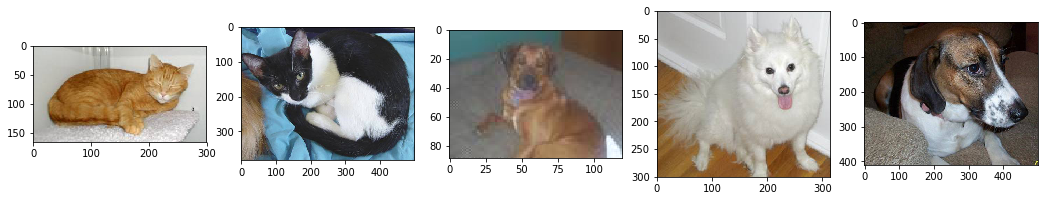

In [25]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train[0])
axes[1].imshow(X_train[1])
axes[2].imshow(X_train[2])
axes[3].imshow(X_train[3])
axes[4].imshow(X_train[4])

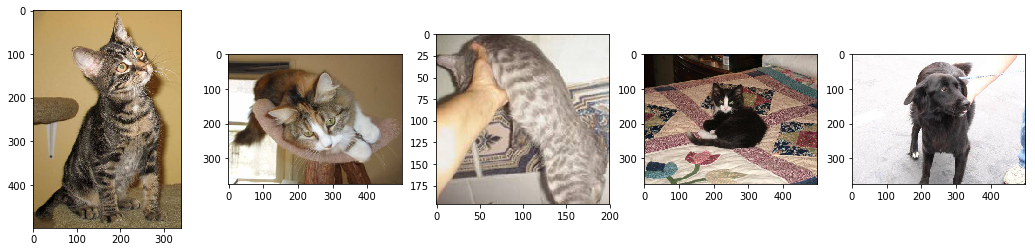

In [26]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test[0])
axes[1].imshow(X_test[1])
axes[2].imshow(X_test[2])
axes[3].imshow(X_test[3])
axes[4].imshow(X_test[4])

## Preprocessing

### Resize Image

In [27]:
# from tqdm import tqdm
from scipy.misc import imresize

def resize_image(original_images, size):
    resized_images = []
    
    for original_image in original_images:
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    
    return resized_images

In [28]:
X_train_224 = resize_image(X_train, (224, 224))
X_train_224.shape

/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(2000, 224, 224, 3)

In [29]:
X_test_224 = resize_image(X_test, (224, 224))
X_test_224.shape

/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(2000, 224, 224, 3)

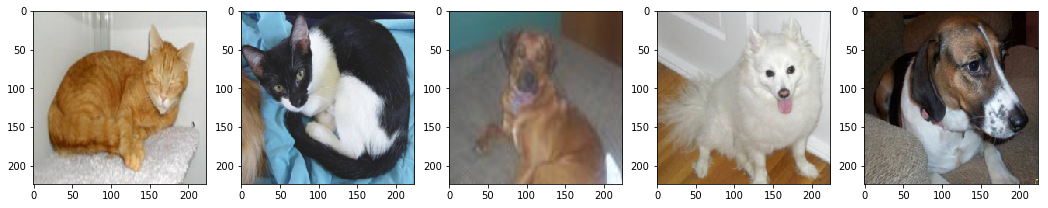

In [30]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train_224[0])
axes[1].imshow(X_train_224[1])
axes[2].imshow(X_train_224[2])
axes[3].imshow(X_train_224[3])
axes[4].imshow(X_train_224[4])

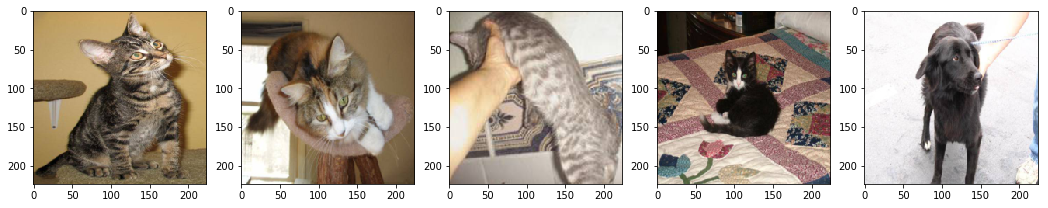

In [31]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test_224[0])
axes[1].imshow(X_test_224[1])
axes[2].imshow(X_test_224[2])
axes[3].imshow(X_test_224[3])
axes[4].imshow(X_test_224[4])

## Build a Model

### Tiny CNN Model

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                kernel_initializer='he_uniform',
                input_shape=(224, 224, 3)))

model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation='relu',
                padding='same',
                kernel_initializer='he_uniform'))

model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128,
               activation='relu',
               kernel_initializer='glorot_uniform'))

model.add(Dense(units=1, 
                activation='sigmoid',
                kernel_initializer='glorot_uniform', 
                bias_initializer='zeros'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51380352  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 51,390,625
Trainable params: 51,390,625
Non-trainable params: 0
________________________________________________________________

In [33]:
from keras.optimizers import SGD

optimizers = SGD(lr=0.00001)

model.compile(optimizer=optimizers,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [34]:
model.fit(X_train_224, y_train, epochs=1)

Epoch 1/1
2000/2000 [==============================] - 302s 151ms/step - loss: 7.9593 - acc: 0.5005


### VGG-16 w/ Pre-trained Model

In [35]:
# pip install h5py

In [37]:
model = Sequential()

model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False,
                input_shape=(224, 224, 3)))

model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2, 2)))

model.add(Conv2D(filters=128,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(Conv2D(filters=128,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2, 2)))

model.add(Conv2D(filters=256,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(Conv2D(filters=256,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(Conv2D(filters=256,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2, 2)))

model.add(Conv2D(filters=512,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(Conv2D(filters=512,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(Conv2D(filters=512,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2, 2)))

model.add(Conv2D(filters=512,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(Conv2D(filters=512,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(Conv2D(filters=512,
                kernel_size=(3, 3),
                activation='relu',
                padding='same',
                trainable=False))

model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2, 2)))


# model.summary()

model.load_weights("../contents/08-06/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

model.add(Flatten())

model.add(Dense(units=128,
               activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(units=1,
               activation='sigmoid',
               kernel_initializer='glorot_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [38]:
from keras.optimizers import SGD

optimizers = SGD(lr=0.0001, momentum=0.9)
# optimizers = SGD(lr=1e-4, momentum=0.9)

model.compile(optimizer=optimizers,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [39]:
model.fit(X_train_224,
         y_train,
         epochs=1)

Epoch 1/1
2000/2000 [==============================] - 1121s 560ms/step - loss: 0.8303 - acc: 0.9080


In [40]:
y_predict = model.predict(X_test_224)
y_predict = (y_predict > 0.5).reshape(-1).astype('int')

In [41]:
accuracy = (y_predict == y_test).mean()
print("Accuracy = {:.5f}".format(accuracy))

Accuracy = 0.94150
